In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Ampliación de Inteligencia Artificial

### Ejercicio  2 de introducción a Scikit Learn (Titanic) 

Vamos a hacer un ejercicio básico de clasificación con el conocido *dataset* del Titanic, que contiene datos de los pasajeros del Titanic el día 15 de abril de 1912, día en que naufragó. Los datos están en formato csv en dos archivos: `train.csv` y `test.csv`.

La idea es aprender un modelo (en este caso, un árbol de clasificación), para predecir si el pasajero sobrevive o no al naufragio, en función de algun de las restantes características. 

Previamente, descargar los archivos csv que se suministran.

#### Ejercicio 1

Cargar train.csv y test.csv en sendos *DataFrame* de pandas

In [3]:
# === Solución
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Ejercicio 2

Explorar las primeras filas de las tablas, y tratar de entender la información contenida en cada columna. Nótese que test.csv no aparece la información relativa a la supervivencia.

In [4]:
# === Solución
print(train.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# ===== Solución:


Los ejercicios que siguen se refieren a los datos de entrenamiento, a menos que se indique explícitamente que se piede algo para los datos de test.

#### Ejercicio 3 

Usando `isnull`, calcular cuantos datos faltan en cada una de las columnas.

In [6]:
### ==== Solución:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Ejercicio 4

Calcular cuántos supervivientes hay.

In [7]:
### Solución:

train["Survived"] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

#### Ejercicio 5

Usar `describe` y deducir de la informacion mostrada el número de supervivientes:

In [17]:
### ===== Solución

train.describe()
# train.describe()["Survived"]["count"] * train.describe()["Survived"]["mean"]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Ejercicio 6

Rellenar la edad en todas las filas en las que falta, tanto en train como en test. Para ello, 
colocar (imputar) la mediana de las edades de los datos de entrenamiento que sí la tiene.

In [34]:
# === Solución:
train["Age"].fillna(train["Age"].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Ejercicio 7 

Añadir una columna `'IsFemale'` que valga 1 en el caso de las mujeres y 0 en el de los hombres (es necesario hacer esta transformación para que los campos que usaremos en sklearn sean numéricos). 

In [41]:
# === Solución:

train["IsFemale"]= (train["Sex"] == "female").astype(int)
test["IsFemale"]= (test["Sex"] == "female").astype(int)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Ejercicio 8

Vamos a continuación a aprender un modelo de predicción, usando las características relativas a la clase del barco en la que se viajaba, la edad y el sexo. Se pide extraer del *DataFrame*  los correspondientes arrays de numpy con los datos (de train y test) y con  la clases esperadas (de train)

In [45]:
# === Solución:

caracteristicas_elegidas = ["Pclass","IsFemale","Age"]

X_train = train[caracteristicas_elegidas].values
X_test = test[caracteristicas_elegidas].values
y_train = train["Survived"].values


#### Ejercicio 9
Usando scikit_learn, aprender un árbol de decisión para predecir, en función de las tres características anteriores, si un pasjero sobrevive o no. Tomar

In [83]:
# === Solución:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [84]:
tree.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Ejercicio 10
Calcular el rendimiento que tiene el árbol obtenido sobre el conjunto de entrenamiento


0.8002244668911336


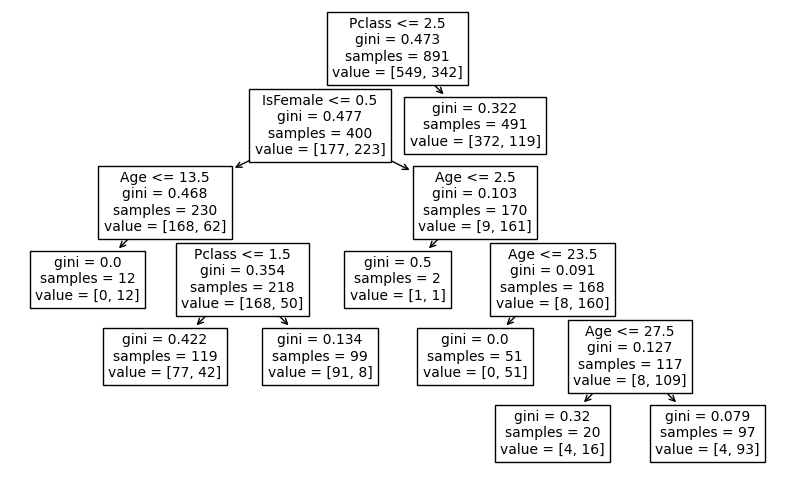

In [87]:
# ==== Solución:
print(tree.score(X_train, y_train))

from sklearn.tree import plot_tree
plot_tree(tree, feature_names= caracteristicas_elegidas, fontsize=10)
plt.show()

#### Ejercicio 11

Incluir una columna `"Survived (pred.)"` en el *DataFrame* de test con el valor de predicción que realiza el modelo aprendido sobre los ejemplos de test.

In [ ]:
# ==== Solución:


test["Survived", ""]